<div>
  <h2>Dataset Info:</h2>
  <p><strong>Content:</strong> You are owning a supermarket mall and through membership cards, you have some basic data about your customers like Customer ID, age, gender, annual income, and spending score. Spending Score is something you assign to the customer based on your defined parameters like customer behavior and purchasing data.</p>
  <p><strong>Problem Statement:</strong> You own the mall and want to understand the customers like who can be easily converge [Target Customers] so that the sense can be given to marketing team and plan the strategy accordingly.</p>
<div>
  <p>Data columns (total 5 columns):</p>
  <ul>
    <li><strong>CustomerID:</strong> 200 non-null int64</li>
    <li><strong>Gender:</strong> 200 non-null object</li>
    <li><strong>Age:</strong> 200 non-null int64</li>
    <li><strong>Annual Income (k$):</strong> 200 non-null int64</li>
    <li><strong>Spending Score (1-100):</strong> 200 non-null int64</li>
  </ul>
</div>

<div>
  <h3>Training a K-Means Clustering Model:</h3>
  <p>To train a K-Means clustering model using the above dataset, follow these steps:</p>
  <ol>
    <li>Load the dataset into a suitable data structure (e.g., pandas DataFrame).</li>
    <li>Preprocess the data if necessary (e.g., handling missing values, encoding categorical variables).</li>
    <li>Choose the number of clusters (K) based on domain knowledge or using techniques like the elbow method.</li>
    <li>Instantiate a KMeans object from scikit-learn library with the chosen number of clusters.</li>
    <li>Fit the KMeans model to the dataset using the fit method.</li>
    <li>Retrieve cluster labels using the labels_ attribute of the fitted KMeans model.</li>
    <li>Perform analysis and visualization on the clustered data to interpret the results.</li>
  </ol>
</div>


# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D

import warnings
warnings.filterwarnings('ignore')

# Constants

In [2]:
DATASET_PATH = '/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv'

# Code

### 1.Data Exploration

In [3]:
df = pd.read_csv(DATASET_PATH)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


### 2. Prepare Features

In [5]:
X = df.iloc[:, [3, 4]].values  # Selecting 'Annual Income' and 'Spending Score' columns

### 3. Finding optimial number of clusters (Using Elbow Method)

In [6]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

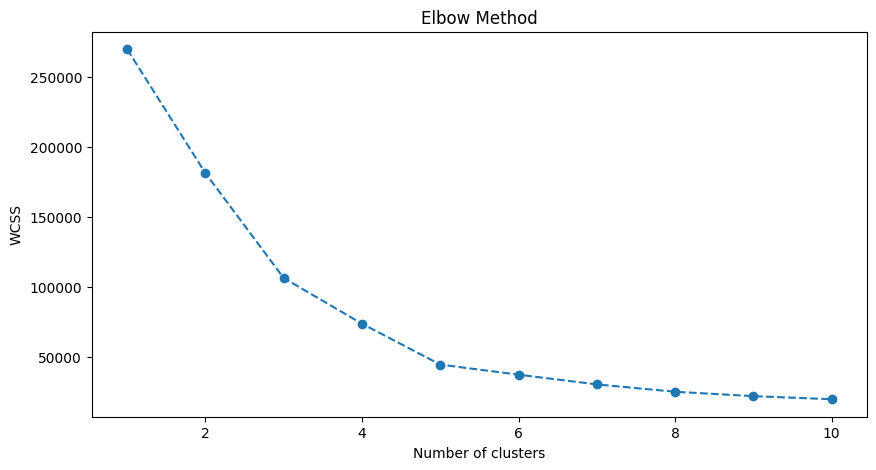

In [7]:
# Plotting the Elbow method
plt.figure(figsize=(10,5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')  # Within Cluster Sum of Squares
plt.show()

### 4. Train the model

In [8]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)

### 5. Visualise the clusters

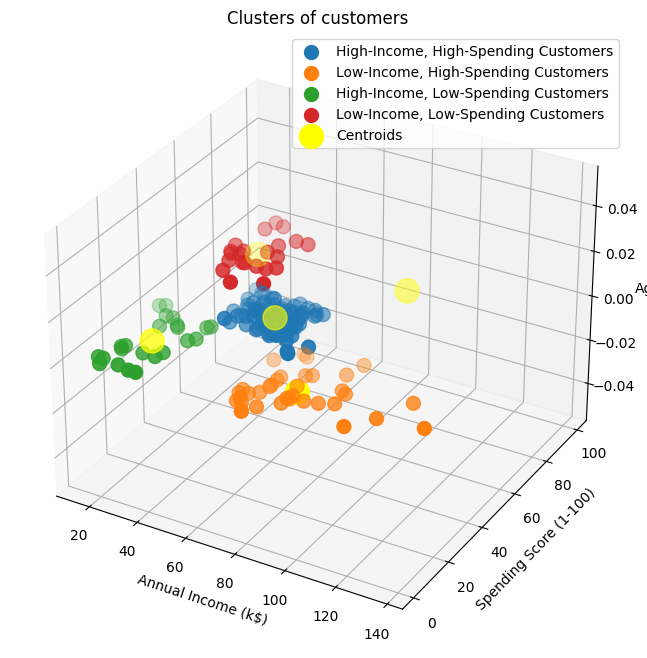

In [9]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Renamed cluster labels
cluster_labels = ['High-Income, High-Spending Customers',
                  'Low-Income, High-Spending Customers',
                  'High-Income, Low-Spending Customers',
                  'Low-Income, Low-Spending Customers']

# Plotting data points and centroids with renamed clusters
for i in range(4):  # Iterate up to 4, not 5
    ax.scatter(X[y_kmeans == i, 0], X[y_kmeans == i, 1], s=100, label=cluster_labels[i])

ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')

ax.set_title('Clusters of customers')
ax.set_xlabel('Annual Income (k$)')
ax.set_ylabel('Spending Score (1-100)')
ax.set_zlabel('Age')
plt.legend()
plt.show()